In [119]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [120]:
x, y =load_digits()['data'], load_digits()['target']

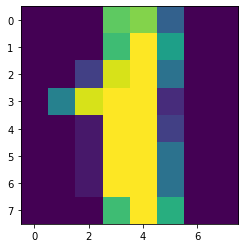

In [121]:
im = x[1].reshape((8,8))
plt.imshow(im)

In [89]:
def PCA(X , num_components): 
    X_meaned = X - np.mean(X , axis = 0)
    cov_mat = np.cov(X_meaned , rowvar = False)
    
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    print(sorted_eigenvalue.shape)
    sorted_eigenvectors = eigen_vectors[:,sorted_index]   
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    print(eigenvector_subset.shape, X_meaned.shape)
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    return X_reduced

In [90]:
X_reduced = PCA(np.array(x),10)

(64,)
(64, 10) (1797, 64)


In [117]:
def PCA(X , perc):
    X_meaned = X - np.mean(X , axis = 0)
    cov_mat = np.cov(X_meaned , rowvar = False)
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    sum_temp_trace=0
    feat_count = 0
    val=[]
    
    sum_trace = sum(sorted_eigenvalue) 
    for eigv in sorted_eigenvalue:
        sum_temp_trace += eigv
        energy = sum_temp_trace/sum_trace
        val.append(energy)
        if energy<perc:
            feat_count+=1
    plt.plot(val)
    plt.axhline(y=perc, c='red')
    eigenvector_subset = sorted_eigenvectors[:,0:feat_count]
    print(eigenvector_subset.shape, X_meaned.shape)
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    return X_reduced

(64, 20) (1797, 64)


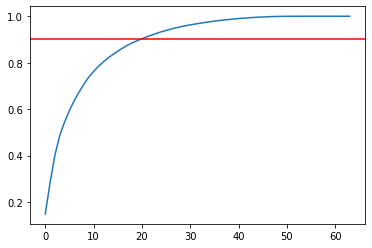

In [118]:
X_reduced = PCA(np.array(x),0.9)

In [112]:
X_reduced.shape

(1797, 20)